In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data=pd.read_csv("../iris.csv")
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [15]:
X=data.drop("species",axis=1)

In [21]:
X_scalled=StandardScaler().fit_transform(X)
X_scalled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [22]:
Y=data.species

In [23]:
features=X_scalled.T
cov_matrix=np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [25]:
values,vector=np.linalg.eig(cov_matrix)
values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [26]:
vector

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [32]:
projected1=X_scalled.dot(vector.T[0])
projected2=X_scalled.dot(vector.T[1])
res=pd.DataFrame(projected1,columns=["pc1"])
res["pc2"]=projected2
res["y"]=Y
res.head()

,pc1,pc2,y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1


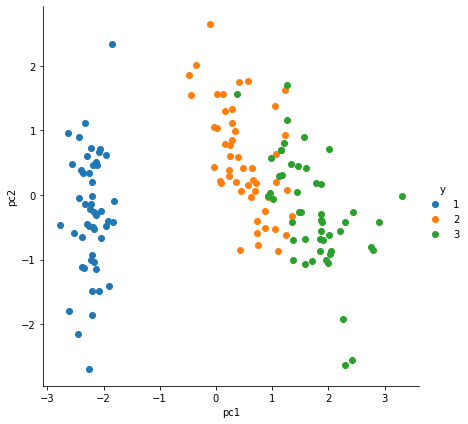

In [49]:
sns.FacetGrid(res,hue="y",height=6).map(plt.scatter,'pc1','pc2').add_legend()